In [2]:
import pandas as pd
import numpy as np
import xarray as xr


In [109]:
df=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/test data/test v3.nc')

In [110]:
df

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 33, time: 8760)
Coordinates:
  * longitude  (longitude) float32 86.0 86.25 86.5 86.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 28.0 27.75 27.5 27.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    mx2t       (time, latitude, longitude) float32 ...
    mn2t       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-28 10:22:14 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [111]:
ds_daily = df.t2m.resample(time='D').mean()
df1 = ds_daily.to_dataframe()
df1=df1.reset_index()
ds_daily_max = df.mx2t.resample(time='D').max()
df2 = ds_daily_max.to_dataframe()
df2=df2.reset_index()
ds_daily_min = df.mn2t.resample(time='D').min()
df3 = ds_daily_min.to_dataframe()
df3=df3.reset_index()


In [112]:
dfs=[df1,df2,df3]
# Initialize the merged_df with the first DataFrame in the list
merged_df = dfs[0]

# Loop through the remaining DataFrames and merge them one by one
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df)

# Now merged_df contains the merged result
merged_df

,time,latitude,longitude,t2m,mx2t,mn2t
0,2021-01-01,28.0,86.00,273.548553,279.278107,269.701263
1,2021-01-01,28.0,86.25,270.683289,274.896942,267.773987
2,2021-01-01,28.0,86.50,264.230194,268.371887,262.197876
3,2021-01-01,28.0,86.75,260.552765,265.818390,258.044922
4,2021-01-01,28.0,87.00,258.714539,264.713226,255.820374
...,...,...,...,...,...,...
349300,2021-12-31,20.0,92.00,297.471527,298.057587,296.997314
349301,2021-12-31,20.0,92.25,297.983612,298.526855,297.447205
349302,2021-12-31,20.0,92.50,298.351776,299.098572,297.638245
349303,2021-12-31,20.0,92.75,298.007294,299.264008,296.302155


In [77]:
import xarray as xr

# Assuming ds is your dataset and temperature is the variable
# Convert the time coordinate to daily frequency
# ds_daily = df.resample(time='D').mean()


# Save the resulting dataset to a new NetCDF file
# ds_daily.to_netcdf('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/test data/daily_temperature.nc')


In [78]:
# df=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/test data/daily_temperature.nc')

In [79]:
# ds_daily

In [20]:
ds=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/ERA 5 /Era5 Temperature/t2m_mxt_mnt.1981.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 33, time: 8760)
Coordinates:
  * longitude  (longitude) float32 86.0 86.25 86.5 86.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 28.0 27.75 27.5 27.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1981-01-01 ... 1981-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    mx2t       (time, latitude, longitude) float32 ...
    mn2t       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-28 11:02:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [21]:
ds_daily = ds.t2m.resample(time='D').mean()
lat_range = slice(26.75,20.25)  # take lat values in backwards directions.
lon_range = slice(87.75,92.80)
data_bangladesh = ds_daily.sel(latitude=lat_range,longitude=lon_range)
# new_lat = np.arange(27.5,19.0, -2.5).astype(np.float32)
# new_lon = np.arange(87.5, 93, 2.5).astype(np.float32)
new_lat = np.arange(26.125,20.25, -1.25).astype(np.float32)
new_lon = np.arange(87.75,92.80, 1.25).astype(np.float32)

# new_lon = np.arange(87.75,92.80, 1.25).astype(np.float32)
# resized_ds = data_bangladesh.interp(latitude=new_lat, longitude=new_lon)
# df = resized_ds.to_dataframe()
# df=df.reset_index()
# df

df = data_bangladesh.to_dataframe()
df=df.reset_index()
df

,time,latitude,longitude,t2m
0,1981-01-01,26.75,87.75,286.970154
1,1981-01-01,26.75,88.00,287.096283
2,1981-01-01,26.75,88.25,288.436523
3,1981-01-01,26.75,88.50,290.155426
4,1981-01-01,26.75,88.75,290.502655
...,...,...,...,...
206950,1981-12-31,20.25,91.75,295.481781
206951,1981-12-31,20.25,92.00,295.493927
206952,1981-12-31,20.25,92.25,295.585297
206953,1981-12-31,20.25,92.50,295.379883


In [19]:
# new_lat = np.arange(26.125,20.25, -1.25).astype(np.float32)
# new_lon = np.arange(87.75,92.80, 1.25).astype(np.float32)
# new_lat

array([26.125, 24.875, 23.625, 22.375, 21.125], dtype=float32)

In [89]:
df=df.set_index('time',inplace=False)
df

,latitude,longitude,t2m
time,,,
1981-01-01,26.75,87.75,286.970154
1981-01-01,26.75,88.00,287.096283
1981-01-01,26.75,88.25,288.436523
1981-01-01,26.75,88.50,290.155426
1981-01-01,26.75,88.75,290.502655
...,...,...,...
1981-12-31,20.25,91.75,295.481781
1981-12-31,20.25,92.00,295.493927
1981-12-31,20.25,92.25,295.585297


In [95]:
t2m_df=df['1981-05-25':'1981-05-25']

t2m_df

,latitude,longitude,t2m
time,,,
1981-05-25,26.75,87.75,297.007965
1981-05-25,26.75,88.00,296.807922
1981-05-25,26.75,88.25,297.662476
1981-05-25,26.75,88.50,298.998505
1981-05-25,26.75,88.75,299.232544
...,...,...,...
1981-05-25,20.25,91.75,301.385345
1981-05-25,20.25,92.00,301.082703
1981-05-25,20.25,92.25,300.894714


In [18]:
# new_lat = np.arange(26.75,20.25, -1.25).astype(np.float32)
# new_lon = np.arange(87.75,92.80, 1.25).astype(np.float32)
# new_lat

array([26.75, 25.5 , 24.25, 23.  , 21.75, 20.5 ], dtype=float32)

In [97]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

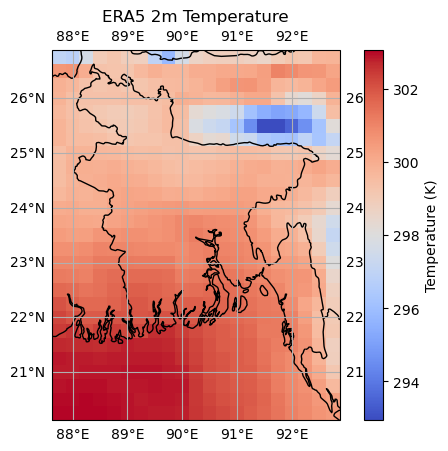

In [98]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df['latitude'].unique()
unique_lon = t2m_df['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df['t2m'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_extent((87.75, 92.75, 20.5, 26.75))


# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()


In [24]:
# df = ds_daily.to_dataframe()

# df

In [25]:
# ds = xr.open_dataset(file_path)
# new_lat = np.arange(90, -91, -02.5).astype(np.float32)
# new_lon = np.arange(0, 360, 02.5).astype(np.float32)
# new_ds = ds.interp(lat=new_lat, lon=new_lon)
lat_range = slice(27.5,20.0)  # take lat values in backwards directions.
lon_range = slice(87.5, 92.5)
data_bangladesh_resized = ds_daily.sel(latitude=lat_range,longitude=lon_range)

In [29]:
new_lat = np.arange(27.5,19.9, -2.5).astype(np.float32)
new_lon = np.arange(87.5, 92.6, 2.5).astype(np.float32)
new_ds = data_bangladesh_resized.interp(latitude=new_lat, longitude=new_lon)
# new_lon
# new_lat

array([27.5, 25. , 22.5, 20. ], dtype=float32)

In [27]:
new_ds

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 4, longitude: 3)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * latitude   (latitude) float32 27.5 25.0 22.5 20.0
  * longitude  (longitude) float32 87.5 90.0 92.5
Data variables:
    t2m        (time, latitude, longitude) float32 277.9 279.3 ... 296.4 298.4
    mx2t       (time, latitude, longitude) float32 278.7 279.8 ... 296.4 298.4
    mn2t       (time, latitude, longitude) float32 277.6 278.9 ... 296.3 298.3
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-28 10:22:14 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
new_lat = np.linspace(27.5, 20.0, 4).astype(np.float32)
new_lon = np.linspace(87.5, 92.5,3 ).astype(np.float32)
new_lon

array([87.5, 90. , 92.5], dtype=float32)

In [76]:
# data_bangladesh_resized.latitude
df = new_ds.to_dataframe()

In [77]:
df

t2m        mx2t        mn2t
time       latitude longitude                                    
2021-01-01 27.5     87.5       277.896332  278.663666  277.603760
                    90.0       279.254486  279.846100  278.942963
                    92.5       277.653748  278.000519  277.357819
           25.0     87.5       287.925690  288.163086  287.196655
                    90.0       290.823151  290.972076  290.083191
...                                   ...         ...         ...
2021-12-31 22.5     90.0       292.802216  292.749451  292.112549
                    92.5       292.732635  292.724121  291.764923
           20.0     87.5       296.679840  296.721619  296.629730
                    90.0       296.370148  296.382660  296.303070
                    92.5       298.351776  298.372406  298.261810

[4380 rows x 3 columns]

In [78]:
df=df.reset_index()
df
# t2m_df=df.drop('index', axis=1)


,time,latitude,longitude,t2m,mx2t,mn2t
0,2021-01-01,27.5,87.5,277.896332,278.663666,277.603760
1,2021-01-01,27.5,90.0,279.254486,279.846100,278.942963
2,2021-01-01,27.5,92.5,277.653748,278.000519,277.357819
3,2021-01-01,25.0,87.5,287.925690,288.163086,287.196655
4,2021-01-01,25.0,90.0,290.823151,290.972076,290.083191
...,...,...,...,...,...,...
4375,2021-12-31,22.5,90.0,292.802216,292.749451,292.112549
4376,2021-12-31,22.5,92.5,292.732635,292.724121,291.764923
4377,2021-12-31,20.0,87.5,296.679840,296.721619,296.629730
4378,2021-12-31,20.0,90.0,296.370148,296.382660,296.303070


In [79]:
df['mx2t'].describe(percentiles=[.5,.75,.90,.95])

count    4380.000000
mean      294.951477
std         7.903660
min       269.954010
50%       298.255753
75%       301.084808
90%       302.122256
95%       302.708105
max       306.117310
Name: mx2t, dtype: float64

In [42]:
df2=df.set_index('time',inplace=False)


In [63]:
t2m_df2=df2['2021-05-03':'2021-05-03']

t2m_df2

,latitude,longitude,t2m,mx2t,mn2t
time,,,,,
2021-05-03,27.5,87.5,284.637939,284.007721,283.163025
2021-05-03,27.5,90.0,284.343292,283.836365,283.244934
2021-05-03,27.5,92.5,281.680756,282.459869,281.654663
2021-05-03,25.0,87.5,299.908417,300.061188,299.379669
2021-05-03,25.0,90.0,299.733612,299.414185,298.819733
2021-05-03,25.0,92.5,298.097076,298.189301,297.605530
2021-05-03,22.5,87.5,302.593597,302.914215,302.302734
2021-05-03,22.5,90.0,301.846405,301.670929,301.097443
2021-05-03,22.5,92.5,302.240753,301.445160,300.645752


In [9]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

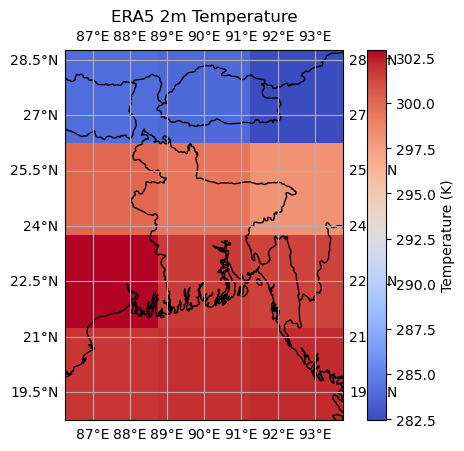

In [65]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df2['latitude'].unique()
unique_lon = t2m_df2['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df2['mx2t'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()


In [174]:
ds=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/ERA 5 /Era5 Temperature/t2m_mxt_mnt.1981.nc')
ds.latitude

<xarray.DataArray 'latitude' (latitude: 33)>
array([28.  , 27.75, 27.5 , 27.25, 27.  , 26.75, 26.5 , 26.25, 26.  , 25.75,
       25.5 , 25.25, 25.  , 24.75, 24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25,
       23.  , 22.75, 22.5 , 22.25, 22.  , 21.75, 21.5 , 21.25, 21.  , 20.75,
       20.5 , 20.25, 20.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 28.0 27.75 27.5 27.25 ... 20.75 20.5 20.25 20.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [175]:
ds_daily_max = ds.t2m.resample(time='D').mean() #change 
lat_range = slice(27.5,20.0)  # take lat values in backwards directions.
lon_range = slice(87.5, 92.5)
data_bangladesh = ds_daily_max.sel(latitude=lat_range,longitude=lon_range)
df1 = data_bangladesh.to_dataframe()
df1=df1.reset_index()
new_lat = np.arange(27.5,19.9, -2.5).astype(np.float32)
new_lon = np.arange(87.5, 92.6, 2.5).astype(np.float32)
resized_ds = data_bangladesh.interp(latitude=new_lat, longitude=new_lon)
df2 = resized_ds.to_dataframe()
df2=df2.reset_index()

In [176]:
# df1=df1.set_index('time',inplace=False)

# df2=df2.set_index('time',inplace=False)
df2
df1

,time,latitude,longitude,t2m
0,1981-01-01,27.5,87.50,272.445892
1,1981-01-01,27.5,87.75,271.367767
2,1981-01-01,27.5,88.00,272.207794
3,1981-01-01,27.5,88.25,273.695709
4,1981-01-01,27.5,88.50,277.109192
...,...,...,...,...
237610,1981-12-31,20.0,91.50,295.502441
237611,1981-12-31,20.0,91.75,295.555267
237612,1981-12-31,20.0,92.00,295.620026
237613,1981-12-31,20.0,92.25,295.672028


In [177]:
t2m_df1=df1['1981-06-03':'1981-06-03']

t2m_df1
t2m_df2=df2['1981-06-03':'1981-06-03']

t2m_df2

TypeError: cannot do slice indexing on RangeIndex with these indexers [1981-06-03] of type str

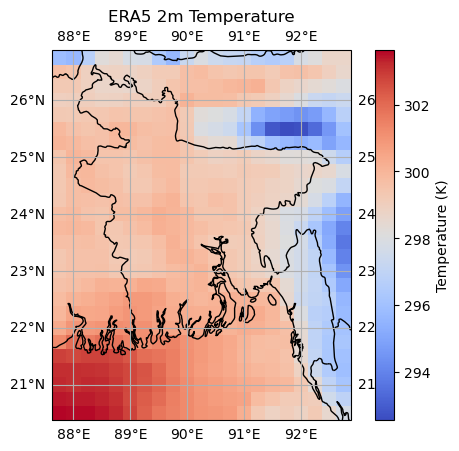

In [178]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df1['latitude'].unique()
unique_lon = t2m_df1['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df1['t2m'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

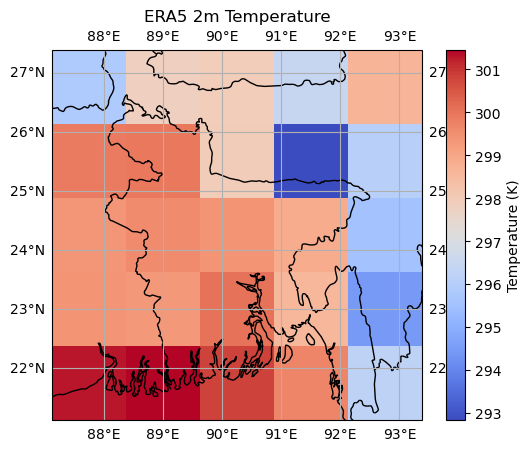

In [179]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df2['latitude'].unique()
unique_lon = t2m_df2['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df2['t2m'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

In [119]:
new_lat = np.arange(26.125,20.25, -1.25).astype(np.float32)
new_lon = np.arange(87.75,92.80, 1.25).astype(np.float32)
new_lat

array([26.125, 24.875, 23.625, 22.375, 21.125], dtype=float32)

In [90]:
ds=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/ERA 5 /Era5 Temperature/t2m_mxt_mnt.2021.nc')
ds.latitude

<xarray.DataArray 'latitude' (latitude: 33)>
array([28.  , 27.75, 27.5 , 27.25, 27.  , 26.75, 26.5 , 26.25, 26.  , 25.75,
       25.5 , 25.25, 25.  , 24.75, 24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25,
       23.  , 22.75, 22.5 , 22.25, 22.  , 21.75, 21.5 , 21.25, 21.  , 20.75,
       20.5 , 20.25, 20.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 28.0 27.75 27.5 27.25 ... 20.75 20.5 20.25 20.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [91]:
ds_daily_max = ds.t2m.resample(time='D').mean() #change 
# lat_range = slice(26.75,20.5)  # take lat values in backwards directions.
# lon_range = slice(87.75, 92.75)
# data_bangladesh = ds_daily_max.sel(latitude=lat_range,longitude=lon_range)
df1 = ds_daily_max.to_dataframe()
df1=df1.reset_index()
# new_lat = np.arange(26.75,20.51, -1.25).astype(np.float32)
# new_lon = np.arange(87.75, 92.76, 1.25).astype(np.float32)
# new_lat = np.arange(26.75,20.51, -1.25).astype(np.float32)
# new_lon = np.arange(87.75, 92.76, 1.25).astype(np.float32)
new_lat = np.arange(26,20.26, -1.25).astype(np.float32)

new_lon = np.arange(88.50,92.76, 1.25).astype(np.float32)
resized_ds = data_bangladesh.interp(latitude=new_lat, longitude=new_lon)
df2 = resized_ds.to_dataframe()
df2=df2.reset_index()

In [92]:
# new_lat = np.arange(26,20.26, -1.25).astype(np.float32)
# new_lat

In [93]:
df1=df1.set_index('time',inplace=False)

df2=df2.set_index('time',inplace=False)
df2
# df1

,latitude,longitude,t2m
time,,,
2021-01-01,26.00,88.50,289.324188
2021-01-01,26.00,89.75,290.456573
2021-01-01,26.00,91.00,289.376007
2021-01-01,26.00,92.25,288.988190
2021-01-01,24.75,88.50,290.239288
...,...,...,...
2021-12-31,22.25,92.25,293.639496
2021-12-31,21.00,88.50,295.432678
2021-12-31,21.00,89.75,295.679657


In [98]:
# t2m_df1=df1['2021-04-03':'2021-04-03']

# t2m_df1
# t2m_df2=df2['2021-04-03':'2021-04-03']

t2m_df2

,latitude,longitude,t2m
time,,,
2021-04-03,26.00,88.50,299.757843
2021-04-03,26.00,89.75,299.983002
2021-04-03,26.00,91.00,299.272125
2021-04-03,26.00,92.25,299.508270
2021-04-03,24.75,88.50,301.950714
2021-04-03,24.75,89.75,301.516663
2021-04-03,24.75,91.00,300.427399
2021-04-03,24.75,92.25,299.281464
2021-04-03,23.50,88.50,302.825623


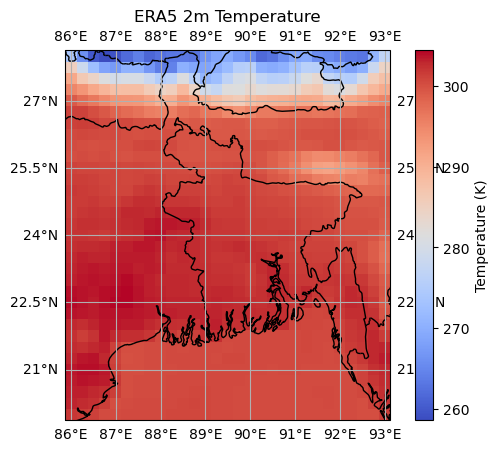

In [95]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df1['latitude'].unique()
unique_lon = t2m_df1['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df1['t2m'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

In [96]:
# import warnings
# warnings.filterwarnings("ignore")



# # Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

# unique_lat = t2m_df2['latitude'].values
# unique_lon = t2m_df2['longitude'].values

# # Reshape the t2m data into a 2D array matching the grid
# t2m_array = t2m_df2['t2m'].values

# # Create a Cartopy PlateCarree projection
# projection = ccrs.PlateCarree()

# # Create a figure and axis
# fig, ax = plt.subplots(subplot_kw={'projection': projection})

# # Plot the temperature data using pcolormesh
# cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# # Add colorbar
# cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# # Set title and labels
# ax.set_title('ERA5 2m Temperature')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Add coastlines and gridlines
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)
# ax.gridlines(draw_labels=True)

# # Show the plot
# plt.show()

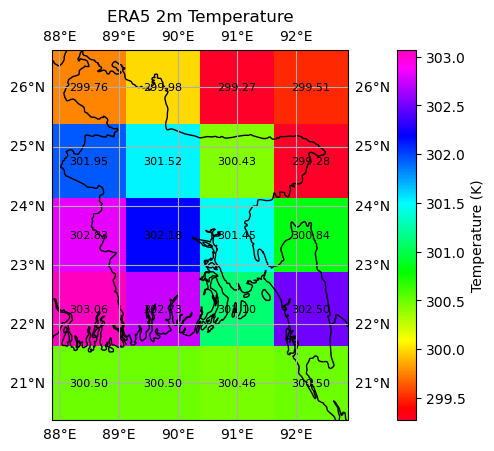

In [102]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df2['latitude'].unique()
unique_lon = t2m_df2['longitude'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array2 = t2m_df2['t2m'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# # Plot the temperature data using pcolormesh
# cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array2, transform=projection, cmap='gist_rainbow')

# # Add colorbar
# cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# # Set title and labels
# ax.set_title('ERA5 2m Temperature')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Add coastlines and gridlines
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)
# ax.gridlines(draw_labels=True)

# # Show the plot
# plt.show()









# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array2, transform=projection, cmap='gist_rainbow')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.10, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Add temperature values as annotations
for i, lat in enumerate(unique_lat):
    for j, lon in enumerate(unique_lon):
        ax.text(lon, lat, f'{t2m_array2[i, j]:.2f}', color='black', fontsize=8, ha='center', va='center', transform=projection)

# Show the plot
plt.show()


In [227]:
ds=xr.open_dataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/ERA 5 /Era5 Temperature/t2m_mxt_mnt.2021.nc')
ds.latitude

<xarray.DataArray 'latitude' (latitude: 33)>
array([28.  , 27.75, 27.5 , 27.25, 27.  , 26.75, 26.5 , 26.25, 26.  , 25.75,
       25.5 , 25.25, 25.  , 24.75, 24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25,
       23.  , 22.75, 22.5 , 22.25, 22.  , 21.75, 21.5 , 21.25, 21.  , 20.75,
       20.5 , 20.25, 20.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 28.0 27.75 27.5 27.25 ... 20.75 20.5 20.25 20.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [228]:
t2m=ds.t2m
t2m

<xarray.DataArray 't2m' (time: 8760, latitude: 33, longitude: 29)>
[8383320 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 86.0 86.25 86.5 86.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 28.0 27.75 27.5 27.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [229]:
weights = np.cos(np.deg2rad(t2m.latitude))
weights.name = "weights"
t2m_weighted = t2m.weighted(weights)

In [230]:
Lille_t2m = t2m_weighted.mean(["longitude", "latitude"])

In [232]:
Lille_1981 = Lille_t2m.sel(time='2021-06')

In [233]:
Lille_1981_max = Lille_1981.groupby('time.day').max('time')

In [234]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

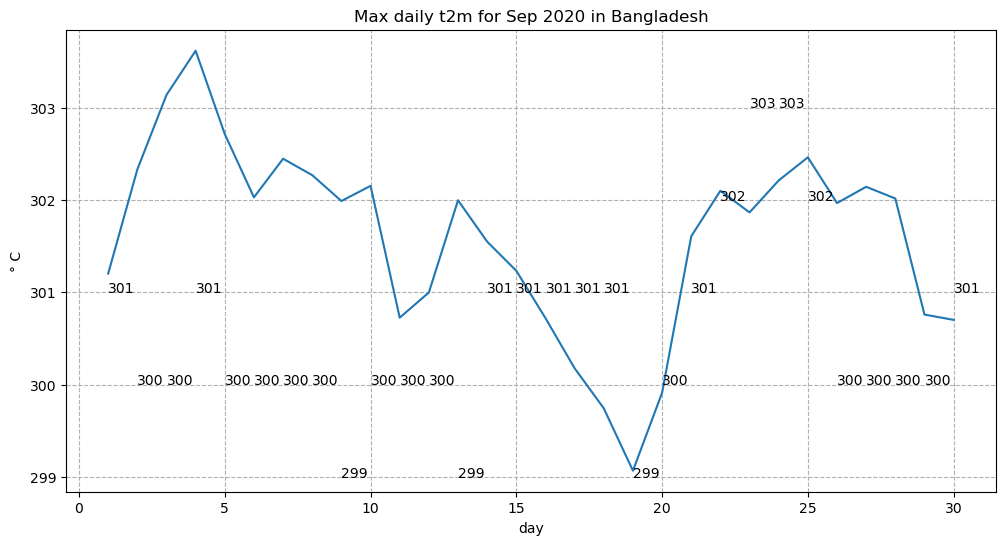

In [235]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.plot(Lille_1981_max.day, Lille_1981_max)
ax.set_title('Max daily t2m for Sep 2020 in Bangladesh')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='--')
for i,j in zip(Lille_2020_max.day, np.around(Lille_2020_max.values, 0).astype(int)):
    ax.annotate(str(j),xy=(i,j))

In [237]:
print('The maximum temperature in September 2020 in this area was', 
      np.around(Lille_1981_max.max().values, 1), 'degrees Kelvin.')

The maximum temperature in September 2020 in this area was 303.6 degrees Kelvin.
